
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-0.05285023 -0.94192879] [0. 1.]
[-0.89394079  1.78570145] [1. 0.]
[-1.40394264  0.25967216] [1. 0.]
[ 1.66573197 -0.21451497] [0. 1.]
[-1.57545398  0.7638314 ] [1. 0.]
[0.4151278  1.21733068] [1. 0.]
[ 0.79893755 -0.25743179] [1. 0.]
[ 0.79211829 -1.5268259 ] [0. 1.]
[-1.14071422  1.660253  ] [1. 0.]
[ 0.51781162 -0.97366037] [0. 1.]
[-0.42802322  0.48432293] [0. 1.]
[-2.12170124 -0.58107171] [1. 0.]
[-1.18297529  1.22277959] [1. 0.]
[-0.58822866  1.56968285] [1. 0.]
[ 0.86762591 -0.83054638] [0. 1.]
[-1.43949698  0.85151564] [1. 0.]
[-0.22743663 -0.55617265] [0. 1.]
[-1.48995447 -0.45744244] [1. 0.]
[-0.07738756 -1.44812975] [0. 1.]
[-1.53013471  0.25105369] [1. 0.]
[-1.115759    1.31566406] [1. 0.]
[ 1.47967799 -0.64991406] [0. 1.]
[-0.86938517  1.59812225] [1. 0.]
[ 0.81674311 -1.24787061] [0. 1.]
[ 0.8852061  -1.14986937] [0. 1.]
[-1.14849036  0.39422802] [1. 0.]
[0.19316434

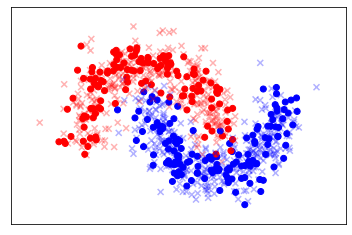

In [ ]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_train.size)
print()
print("  first ", round(y_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_train.size/10) )):
    print( X_train[i], Y_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**


In [ ]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(5, ), activation='tanh', solver='sgd', 
                    alpha=0.003, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=1000, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()

# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)


MLPClassifier(activation='tanh', alpha=0.003, batch_size=4,
              hidden_layer_sizes=(5,), learning_rate_init=0.005, max_iter=1000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.02753048
Iteration 2, loss = 0.75055582
Iteration 3, loss = 0.63941884
Iteration 4, loss = 0.59524170
Iteration 5, loss = 0.57573918
Iteration 6, loss = 0.56192354
Iteration 7, loss = 0.55542873
Iteration 8, loss = 0.55178730
Iteration 9, loss = 0.54755703
Iteration 10, loss = 0.54595424
Iteration 11, loss = 0.54461677
Iteration 12, loss = 0.54344540
Iteration 13, loss = 0.54226660
Iteration 14, loss = 0.53971419
Iteration 15, loss = 0.53916277
Iteration 16, loss = 0.53877195
Iteration 17, loss = 0.53814725
Iteration 18, loss = 0.53537235
Iteration 19, loss = 0.53514736
Iteration 20, loss = 0.53441515
Iteration 21, loss = 0.53236517
Iteration 22, loss = 0.53048548
Iteration 23, loss = 0.52867332
Iteration 

**Visualize the learnt boundary between classes in (2D) input space**

** THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

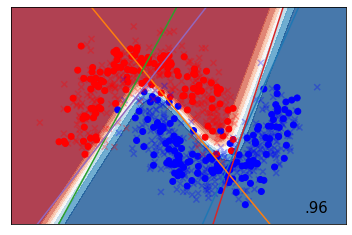

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

#show the lines
coeff=clf.coefs_
inter=clf.intercepts_
x=np.arange(x_min, x_max, h)
for i in range(0,len(coeff[0][0][:])):
    coeff0, coeff1 = coeff[0][0][i], coeff[0][1][i]
    Y=(-coeff0/coeff1)*x - inter[0][i]/coeff1
    plt.plot(x,Y)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


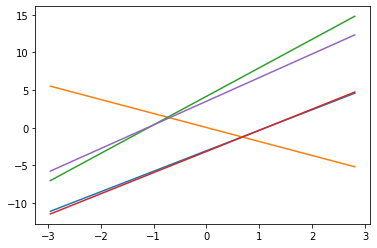

In [ ]:
#show the lines
coeff=clf.coefs_
inter=clf.intercepts_
x=np.arange(x_min, x_max, h)
for i in range(0,len(coeff[0][0][:])):
    coeff0, coeff1 = coeff[0][0][i], coeff[0][1][i]
    Y=(-coeff0/coeff1)*x - inter[0][i]/coeff1
    plt.plot(x,Y)

Now, **, by changing MLPClassifier parameters above and then rerunning training+eval+plots, check the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**

### **Finally, you can have a try at using grid-search and cross-validation to find optimal set of learning hyper-parameters (see code below).**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01]}
 ]
#print(param_grid)

# Cross-validation grid-search

clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
   beta_2=0.999, early_stopping=False, epsilon=1e-08,
   hidden_layer_sizes=(10,), learning_rate='constant',
   learning_rate_init=0.005, max_iter=500, momentum=0.8,
   nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
   solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
   warm_start=False), 
   param_grid, cv=3, scoring='accuracy')

clf.fit(X_train, Y_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
       % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Y_test_OneHot, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

/home/jesusbm/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jesusbm/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jesusbm/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jesusbm/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  %

Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (25,), 'learning_rate_init': 0.003}

Grid scores on development set:

0.933 (+/-0.096) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.937 (+/-0.086) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.952 (+/-0.028) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.941 (+/-0.010) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.963 (+/-0.021) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.963 (+/-0.021) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.952 (+/-0.021) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.948 (+/-0.055) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
0.967 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (15,), 'learning_rate_init':

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.

**Assignment #4: display the confusion matrix as a prettier and more easily understable plot (cf. example on https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)**

**Assignment #5 (optional): plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

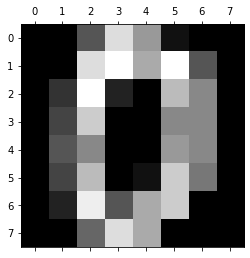

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.01, max_iter=100, momentum=0.8,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=11, shuffle=True, solver='sgd', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)
Iteration 1, loss = 1.81565728
Iteration 2, loss = 1.28122415
Iteration 3, loss = 1.08780603
Iteration 4, loss = 1.00481051
Iteration 5, loss = 0.76153954
Iteration 6, loss = 0.78718229
Iteration 7, loss = 0.72549069
Iteration 8, loss = 0.79165383
Iteration 9, loss = 0.60906197
Iteration 10, loss = 0.57891986
Iteration 11, loss = 0.58764847
Iteration 12, loss = 0.72024492
Iteration 13, loss = 0.69371174
Iteration 14, loss = 0.82597340
Iteration 15, loss = 0.68890423
Iteration 16, loss = 0.50700191
Iteration 17

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
n_classes = 10
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

first_hidden_layers = 10
clf = MLPClassifier(hidden_layer_sizes=(first_hidden_layers, ), activation='tanh', solver='sgd', 
                    alpha=0.0001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=100, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)

# Evaluate acuracy on test data
score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))


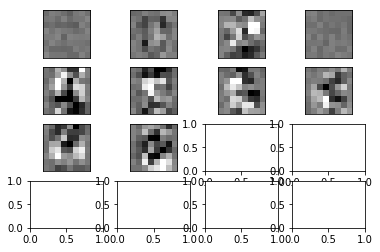

In [ ]:
tmp = np.int(np.floor(np.sqrt(first_hidden_layers)))+1
fig, axes = plt.subplots(tmp,tmp)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Confusion matrix, without normalization
[[90  0  0  0  2  0  1  1  0  0]
 [ 0 80  8  0  1  0  0  2  1  0]
 [ 0  0 79  1  0  0  1  0  0  0]
 [ 0  0  3 92  0  0  1  1  0  0]
 [ 1  2  0  0 96  0  0  0  0  1]
 [ 0  2  5 12  2 62  3  2  0  1]
 [ 1  0  0  0  1  0 83  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0 12  6  2  0  0  0  3 68  0]
 [ 0  3  0  3  0  4  0  5  4 62]]
Normalized confusion matrix
[[0.96 0.   0.   0.   0.02 0.   0.01 0.01 0.   0.  ]
 [0.   0.87 0.09 0.   0.01 0.   0.   0.02 0.01 0.  ]
 [0.   0.   0.98 0.01 0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.03 0.95 0.   0.   0.01 0.01 0.   0.  ]
 [0.01 0.02 0.   0.   0.96 0.   0.   0.   0.   0.01]
 [0.   0.02 0.06 0.13 0.02 0.7  0.03 0.02 0.   0.01]
 [0.01 0.   0.   0.   0.01 0.   0.98 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.99 0.   0.  ]
 [0.   0.13 0.07 0.02 0.   0.   0.   0.03 0.75 0.  ]
 [0.   0.04 0.   0.04 0.   0.05 0.   0.06 0.05 0.77]]


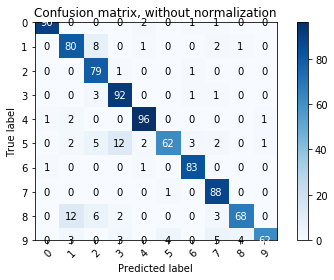

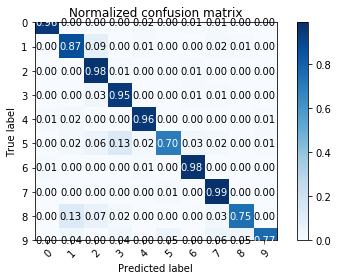

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=np.arange(n_classes),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=np.arange(n_classes), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

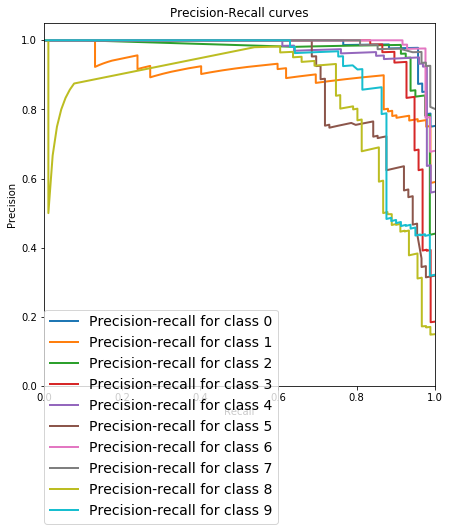

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

Y_true = label_binarize(y_true, classes=np.arange(n_classes))
Y_score = clf.predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_true[:,i],
                                                        Y_score[:,i])
    
plt.figure(figsize=(7, 8))
lines = []
labels = []

for i in range(n_classes):
    l, = plt.plot(recall[i], precision[i], lw=2) #color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0}'
                  ''.format(i))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()